In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import stats

In [5]:
df = pd.read_excel("https://github.com/mrfirdauss-20/data-covid-dsa/blob/master/Daily%20Update%20Data%20Agregat%20Covid-19%20Jakarta.xlsx?raw=true")
df.tail()

HTTPError: ignored

In [ ]:
# data desc
df['Positif Harian (Jakarta)'].describe()

count     484.000000
mean     1074.506198
std      1184.177270
min         0.000000
25%       195.750000
50%       843.000000
75%      1345.000000
max      9394.000000
Name: Positif Harian (Jakarta), dtype: float64

### Deteksi outliers menggunakan beberapa variabel:
- Meninggal harian Indonesia
- Dirawat Harian (Indonesia)
- Self-Isolation Harian (Jakarta)

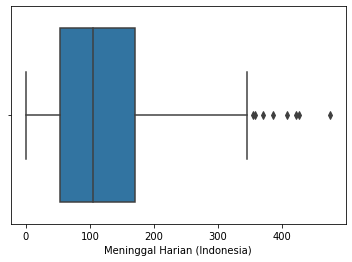

In [ ]:
# cek outlier secara visual
sns.boxplot(x=df['Meninggal Harian (Indonesia)'])


In [ ]:
# IQR Meninggal Harian (Indonesia)
def batas(df):    
    q1 = df['Meninggal Harian (Indonesia)'].quantile(0.25)
    q3 = df['Meninggal Harian (Indonesia)'].quantile(0.75)
    iqr = q3-q1
    batas_luar = 3*iqr
    lower = q1-batas_luar
    upper = q3+batas_luar
    return lower, upper

lower, upper = batas(df)
print('batas bawah adalah: ', lower)
print('batas atas adalah: ', upper)

batas bawah adalah:  -302.75
batas atas adalah:  526.75


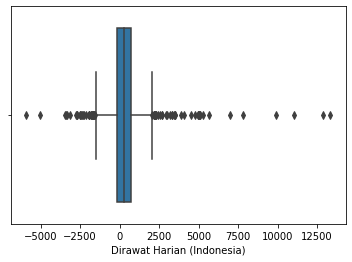

In [ ]:
sns.boxplot(x=df['Dirawat Harian (Indonesia)'])

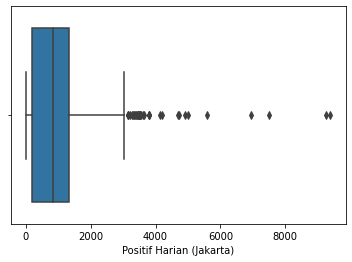

In [ ]:
sns.boxplot(x=df['Positif Harian (Jakarta)'])

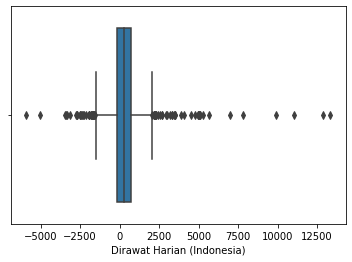

In [ ]:
sns.boxplot(x=df['Dirawat Harian (Indonesia)'])

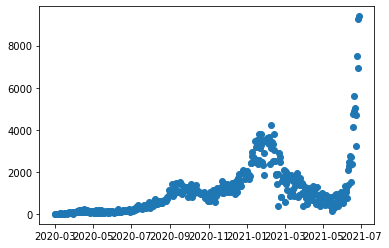

In [25]:
fig, scat_pos = plt.subplots()
scat_pos.scatter(df.Tanggal, df['Positif Harian (Jakarta)'])

(array([263., 145.,  39.,  23.,   6.,   4.,   0.,   2.,   0.,   2.]),
 array([   0. ,  939.4, 1878.8, 2818.2, 3757.6, 4697. , 5636.4, 6575.8,
        7515.2, 8454.6, 9394. ]),
 <a list of 10 Patch objects>)

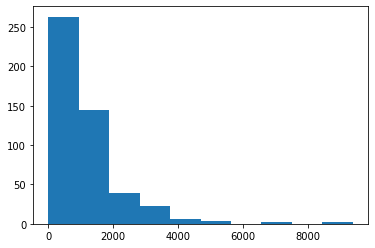

In [ ]:
plt.hist(x=df['Positif Harian (Jakarta)'])

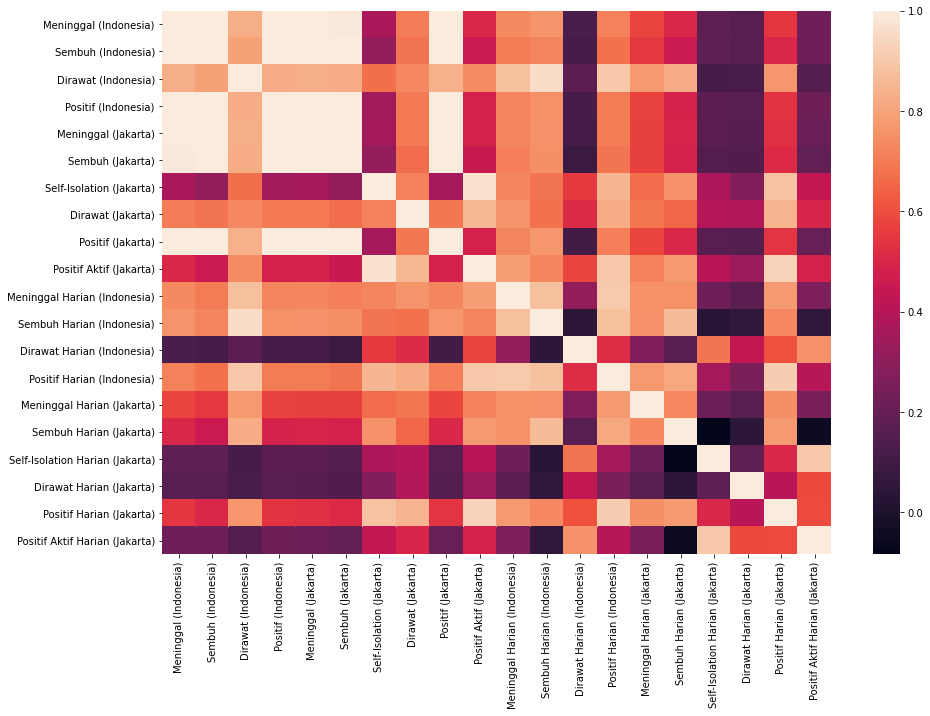

In [ ]:
# korelasi tiap variabel
filter = df.drop("Tanggal",axis=1)
plt.subplots(figsize=(15,10))
sns.heatmap(filter.corr())


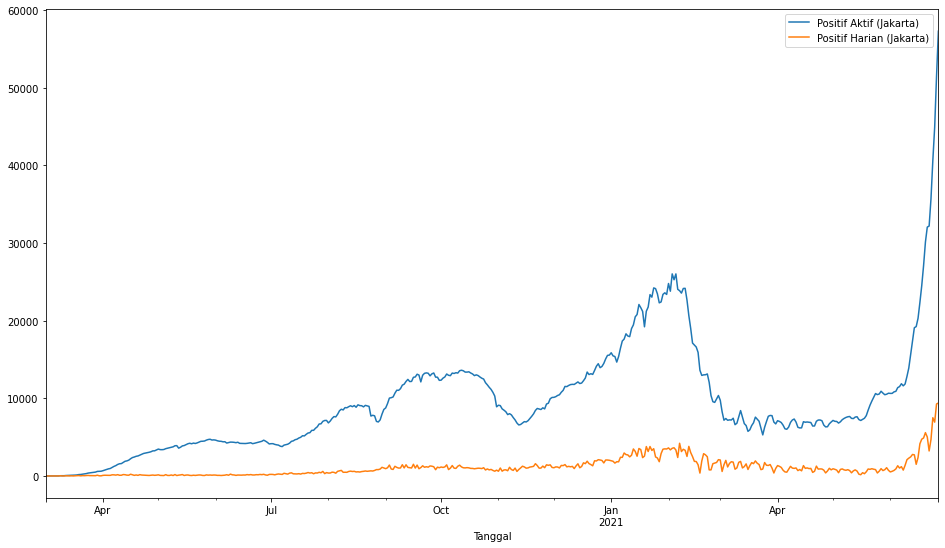

In [31]:
df[['Positif Aktif (Jakarta)','Positif Harian (Jakarta)']].plot(figsize=(16,9))

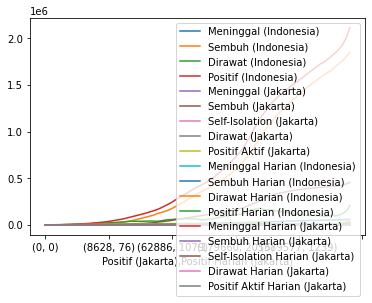

In [25]:
df.groupby(['Positif Aktif (Jakarta)','Positif Harian (Jakarta)']).sum().plot()

In [ ]:
# korelasi isoman dan tingkat sembuh harian
corr1 = df['Positif (Indonesia)']
corr2 = df['Meninggal (Indonesia)']
corr, _ = pearsonr(corr1,corr2)
corr

In [ ]:
scatter = sns.lmplot(x="Positif (Indonesia)", y="Meninggal (Indonesia)", data = df)

- Kesimpulan nilai korelasi:
Variabel positif (indonesia) dan meninggal (indonesia) mempunyai tingkat korelasi positif kuat sebesar 0.99, semakin tinggi tingkat positif semakin tinggi pula tingkat kematian.